In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/CoilData.csv")
df


,coil,furnace Number,analyse,Hardness_1,Hardness_2,Width,Temperature before finishing mill,Temperature after finishing mill,Thickness,Thickness profile,...,p,s,al,ma,b,n,ti,cr,va,mo
0,396378,1,K371,10003,101,1302.1,1147,921,4.36,31,...,133,143,304,291,1,34,6,302,0,25
1,396376,3,K371,10123,101,1282.3,1150,920,4.37,35,...,118,90,395,384,1,33,12,189,25,7
2,396377,4,K321,10040,102,1297.4,1183,933,4.43,25,...,108,115,476,463,1,20,11,288,0,40
3,396379,3,K371,10243,102,1295.2,1165,910,4.44,28,...,139,98,306,296,1,21,9,253,0,9
4,396380,4,K321,10012,100,1293.3,1192,909,3.95,26,...,112,121,340,329,1,28,8,297,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57089,20814,1,K371,9781,98,1010.0,1193,883,1.84,20,...,53,129,303,296,1,30,8,238,1,27
57090,20815,3,K371,9799,98,1010.6,1176,900,1.84,19,...,59,127,315,308,1,32,8,236,1,25
57091,20816,1,K371,9864,99,1008.6,1187,909,1.84,17,...,80,120,355,347,1,37,9,230,0,21
57092,20817,3,K371,10039,100,1012.7,1161,893,1.84,21,...,108,129,306,296,1,27,7,280,0,25


In [100]:
#Reading Seperate CSV files

dfb4 = "data/SignalExport/400442B4.csv"
dfb5 = "data/SignalExport/400442B5.csv"


def read_single_csv(filename):

    with open(filename) as f:
        data = f.read()

    #Split values in lengthpoints & values
    data = data.split(":;")[1].split("Values")
    length = data[0].split(";")
    width = data[1].split(";")

    #Remove empty values & turn data into floats instead of strings
    length = [x for x in length if x]
    length = [float(x) for x in length]
    width = [x for x in width if x]
    width = [float(x) for x in width]


    #Put the data into a dataframe
    df = pd.DataFrame()
    df['length'] = length
    df['width'] = width


    #Remove leading zeros & cut off first measurements 
    df = (df[df['width'] != 0])
    df = df[(df['length'] >= 45) ]
    return df


b4 = read_single_csv(dfb4)
b5 = read_single_csv(dfb5)



        length   width
127   45.08832  1261.8
128   45.52609  1261.8
129   45.96408  1261.8
130   46.40185  1261.8
131   46.83995  1261.2
..         ...     ...
456  197.83190  1256.5
457  198.32680  1256.5
458  198.82190  1256.5
459  199.31720  1257.2
460  199.81280  1257.2

[334 rows x 2 columns]
        length   width
143   45.17400  1264.4
144   45.64778  1264.4
145   46.12173  1264.0
146   46.59560  1263.5
147   47.06955  1262.6
..         ...     ...
440  197.30890  1256.5
441  197.87090  1256.3
442  198.43340  1256.3
443  198.99660  1256.3
444  199.56040  1256.1

[302 rows x 2 columns]


<AxesSubplot:xlabel='length', ylabel='width'>

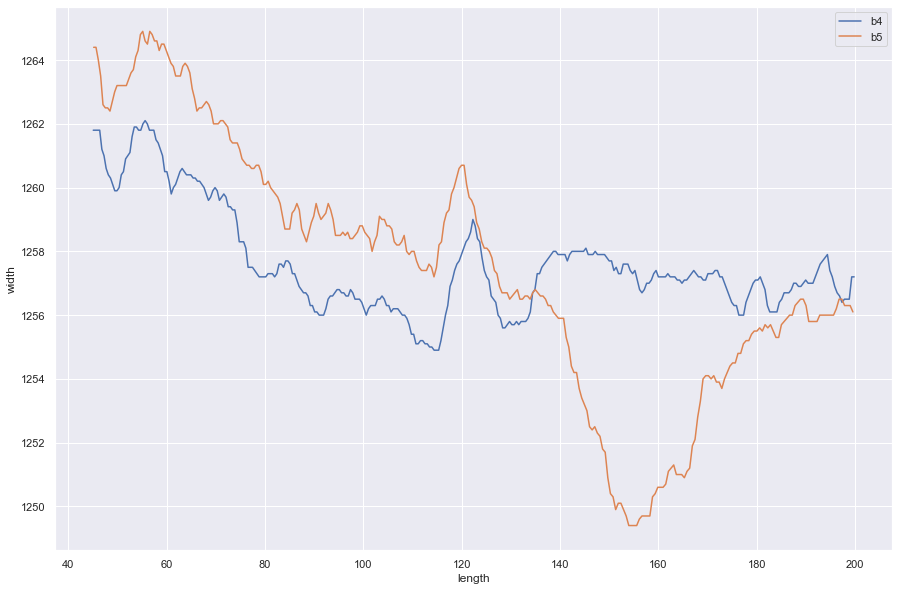

In [101]:
#Plot Data 
sns.set(rc={'figure.figsize':(15,10)})

sns.lineplot(data=b4,x='length',y='width',label='b4')
sns.lineplot(data=b5,x='length',y='width',label='b5')